In [1]:
from google.colab import files
file = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(file["WA_Fn-UseC_-Telco-Customer-Churn.csv"]))

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check null field
df.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Checking types of fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

<ipython-input-8-59466351b608>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [9]:
df["TotalCharges"].isna().any()

False

In [10]:
# Customer ID Does not contribute to CAhurning of the customer, Hence, We can drop
df.drop("customerID", axis=1, inplace=True)

In [11]:
# Get information about the column that is not dtype integer and float
# Get information about the number of values they have

columns_to_encode = [col for col in df.columns if df[col].dtype not in ["int64",  "float64"]]
columns_to_encode

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [12]:
# Function that takes in the columns_to_encode and print Number of different values that field Has and append it to array and Later print it
def PrintNumberOfValues(columns):
    result = {}
    for column in columns:
        values_count = df[column].nunique()
        result[column] = values_count
    return result


column_values = PrintNumberOfValues(columns_to_encode)

In [13]:
column_values

{'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'Churn': 2}

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Getting the columns to label Encode
columns_to_label_encode = [col for col in column_values.keys()]
columns_to_label_encode

# Function to label Encode the variables

def LabelEncodeColumns(columns):
    label_encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[f"{column}_Encoded"] = le.fit_transform(df[column])
        label_encoders[column] = le
    return label_encoders

In [16]:
label_encoders = LabelEncodeColumns(columns_to_label_encode)
label_encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [17]:
colums_to_drop = [col for col in columns_to_label_encode]
colums_to_drop

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
df.drop(columns=colums_to_drop, inplace=True)

In [19]:
# Visualization of Data
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='gender_Encoded', ylabel='count'>

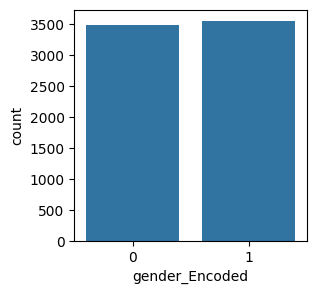

In [20]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x="gender_Encoded") # Distribution of different Categorical Variables


<Axes: xlabel='gender_Encoded', ylabel='count'>

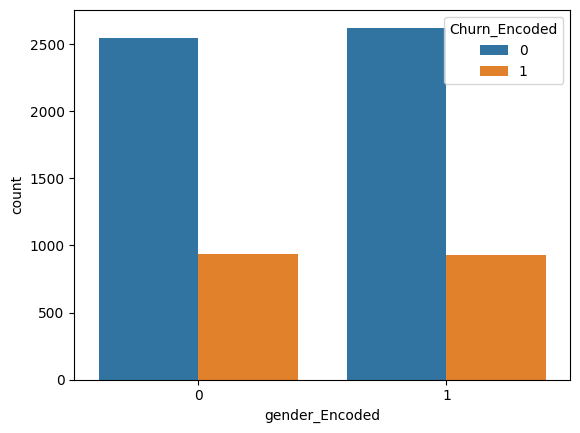

In [21]:
sns.countplot(data=df, x="gender_Encoded", hue="Churn_Encoded")

<Axes: xlabel='Churn_Encoded', ylabel='MonthlyCharges'>

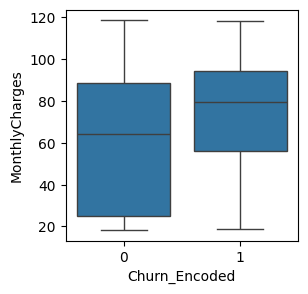

In [22]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df, y="MonthlyCharges", x="Churn_Encoded")

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

In [24]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        return self.data[index], self.labels[index]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Churn_Encoded", axis=1), df["Churn_Encoded"], test_size=0.2, stratify=df["Churn_Encoded"], random_state=42)
print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


In [26]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data.values
        self.labels = labels.values
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        return torch.tensor(self.data[index], dtype=torch.float32), torch.tensor(self.labels[index], dtype=torch.long)


train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [27]:
train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=32)

In [65]:

test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=1)

In [28]:
# Actual Model

class ChurnPredictor(nn.Module):
    def __init__(self, input_shape):
        super(ChurnPredictor, self).__init__()
        self.fc1 = nn.Linear(input_shape, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)

    def forward(self, inputs):
        x = torch.relu(self.fc1(inputs))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.sigmoid(self.output(x))
        return x

In [29]:
model = ChurnPredictor(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [31]:
def BinaryAccuracy(y_pred, labels):
    results = torch.round(y_pred) # Round the y_pred to 1 or 0
    correct_result_sum = (results == labels).sum().float() # Sum the correct predictions
    acc = correct_result_sum / labels.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [32]:
losses = []
accuracies = []
model.train()
epochs = 1000


for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0


    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()

        y_pred = model(data)

        labels = labels.unsqueeze(1).float()

        loss = criterion(y_pred, labels)

        acc = BinaryAccuracy(y_pred, labels)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_accuracy += acc
    if epoch % 100 == 0:
        print(f"Epoch Loss: {epoch_loss / len(train_loader)} | Epoch Accuracy: {epoch_accuracy / len(train_loader)}")
        losses.append(epoch_loss / len(train_loader)) # Append loss to losses after Each Epoch. Divide by number of total data to get average
        accuracies.append(epoch_accuracy / len(train_loader)) # Append Accuracies to accuracies after Each Epoch. Divide by number of total data to get average


Epoch Loss: 1.249529891600043 | Epoch Accuracy: 71.26553344726562
Epoch Loss: 0.4082742601127948 | Epoch Accuracy: 80.62146759033203
Epoch Loss: 0.3776783625789955 | Epoch Accuracy: 82.89265441894531
Epoch Loss: 0.35722162690287257 | Epoch Accuracy: 83.14689636230469
Epoch Loss: 0.34136634235833324 | Epoch Accuracy: 83.9039535522461
Epoch Loss: 0.3216999406784268 | Epoch Accuracy: 85.2768325805664
Epoch Loss: 0.2982257895887235 | Epoch Accuracy: 86.2203369140625
Epoch Loss: 0.3047108137190847 | Epoch Accuracy: 85.89830780029297
Epoch Loss: 0.28007133982780963 | Epoch Accuracy: 86.80790710449219
Epoch Loss: 0.2810583597925192 | Epoch Accuracy: 86.85311126708984


In [33]:
losses

[1.249529891600043,
 0.4082742601127948,
 0.3776783625789955,
 0.35722162690287257,
 0.34136634235833324,
 0.3216999406784268,
 0.2982257895887235,
 0.3047108137190847,
 0.28007133982780963,
 0.2810583597925192]

In [ ]:
accuracies = [acc.cpu().numpy() for acc in accuracies]

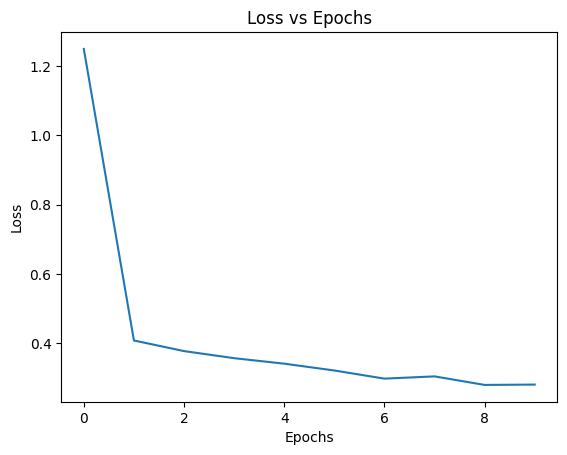

In [45]:
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

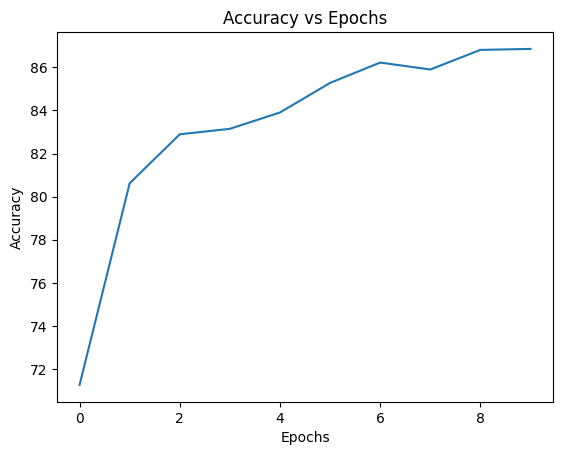

In [44]:
plt.plot(accuracies)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [66]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        y_pred_probabilities = model(data)
        y_pred = torch.round(y_pred_probabilities)
        y_pred_list.append(y_pred.cpu().numpy())

y_pred = [pred.squeeze().tolist() for pred in y_pred_list]

In [67]:
print(type(y_pred))
print(type(y_test))

<class 'list'>
<class 'list'>


In [68]:
print(len(y_pred))
print(len(y_test))

1409
1409


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



<Axes: >

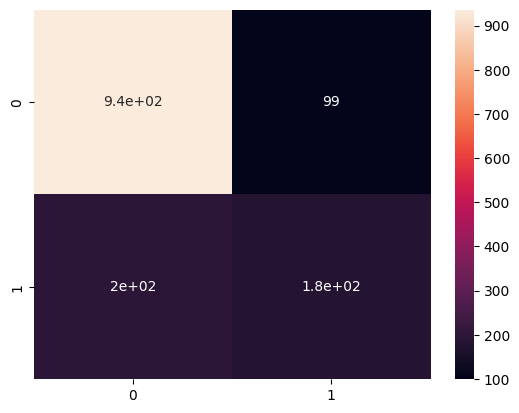

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)